In [1]:
import pandas as pd

# 강서구 월별 오염물 별 농도

In [201]:
# df = pd.read_csv('C:/codeit/rawdata.csv')

df = df[['월','pm2.5','so2','o3','no2','pm10']]

# lists = ['pm2.5','so2','o3','no2','pm10']

# for particle in lists:
#     for i in range(1,13):
#         print((df.loc[df['월'] == i, particle]).mean())
#     print('--------------------', particle)
    
# import seaborn as sns

# dataframe 을 만들어야해. row 는 월별, column은 물질별

pm25 = []

for i in range(1,13):
    pm25.append((df.loc[df['월'] == i, 'pm2.5']).mean())
month = []
for i in range(1,13):
    month.append(i)

diction = {
    'month': month,
    'pm25': pm25
}
df1 = pd.DataFrame(diction)
df1 = df1.set_index('month')

df1


,pm25
month,
1,30.443919
2,32.975262
3,30.360457
4,30.096729
5,26.132153
6,27.153203
7,23.711486
8,16.739689
9,13.832012


# 강서구 월별 pm2.5 평균 농도

In [155]:
for i in range(1,13):
    print(df.loc[df['월']==i,'pm2.5'].mean())

30.443918918918918
32.97526236881559
30.360457296570274
30.096729297146833
26.132152588555858
27.153203342618383
23.711486486486486
16.73968897903989
13.832011535688537
18.253878702397742
30.771587743732592
25.923751686909583


# 문자열 처리 (부산시 강서구) ==> (강서구)

In [98]:
ad = pd.read_csv('C:/codeit/alldata.csv')
ad.head()
ad['지역'] = ad['지역'].apply(lambda e: e.split()[1]) # 개쩔~~~~
ad['지역'].unique()

array(['강서구', '금정구', '기장군', '남구', '동구', '동래구', '부산진구', '북구', '사상구', '사하구',
       '서구', '수영구', '연제구', '영도구', '중구', '해운대구'], dtype=object)

In [159]:
busan_district = ['강서구', '금정구', '기장군', '남구', '동구', '동래구', '부산진구', '북구', '사상구', '사하구','서구', '수영구', '연제구', '영도구', '중구', 
                  '해운대구']

# pm25 = ad[['월','지역','pm2.5']]

# for district in busan_district:
#     pm25[pm25['지역'] == district]
    
#     for i in range(1,13):

# 이중 포문하면 너무 오래걸려

# haeundae = pm25[pm25['지역'] == '해운대구']
# for i in range(1,13):
#     print((haeundae.loc[haeundae['월'] == i,'pm2.5']).mean())

##     print((haeundae.loc[haeundae['월'] == i,'pm2.5']).mean())
##    print(haeundae.loc[haeundae['월'] == i,'pm2.5']).mean()
## print문을 감싸는 괄호가 있냐 없냐의 차이는 크다!


In [250]:
# 봄 여름 가을 겨울, 16개 구
ad = ad[['지역','월','pm2.5']]
kangseo = ad.loc[ad['지역'] =='강서구']
# kangseo[kangseo['월'] == 5] # 1416 ~ 7967
spring = kangseo.iloc[1416:7968, :]
spring['pm2.5'].mean()
# kangseo.loc[kangseo['월'] == 3, 'pm2.5'].mean()

28.880484811291808

In [301]:
ad = ad[['지역','월','pm2.5']]
kangseo = ad.loc[ad['지역'] =='강서구']
spring = ((kangseo['월'] >= 3) & (kangseo['월'] <= 5))
kangseo[spring]['pm2.5'].mean()
# summer = ((kangseo['월'] >= 6) & (kangseo['월'] <= 8)).mean()
# fall = ((kangseo['월'] >= 9) & (kangseo['월'] <= 11)).mean()
# winter = ((kangseo['월'] <= 2) + (kangseo['월'] == 12)).mean()
# kangseo_list = [summer, spring, fall, winter]
# kangseo_list


28.860883424408016

In [314]:
ad = ad[['지역','월','pm2.5']]
busan_district = ['강서구', '금정구', '기장군', '남구', '동구', '동래구', '부산진구', '북구', '사상구', '사하구','서구', '수영구', '연제구', '영도구', '중구', 
                  '해운대구']
for b_district in busan_district:
    district = ad.loc[ad['지역'] == b_district]

    spring = district[((district['월'] >= 3) & (district['월'] <= 5))]['pm2.5'].mean()
    summer = district[((district['월'] >= 6) & (district['월'] <= 8))]['pm2.5'].mean()
    fall = district[((district['월'] >= 9) & (district['월'] <= 11))]['pm2.5'].mean()
    winter = district[((district['월'] <= 2) + (district['월'] == 12))]['pm2.5'].mean()
    
    print(spring,',', summer,',', fall,',', winter )
#     print(b_district ,'spring:', spring,' summer:', summer,' fall:', fall,' winter:', winter )
#     print(b_district , 'spring:', spring, 'summer:', summer, 'fall:', fall, 'winter:', winter)
# 아래 자료를 dataframe에 넣을 수 있을까?

28.860883424408016 , 22.489874857792948 , 21.046215515208676 , 29.67062383612663
27.455699123211815 , 21.147045454545456 , 19.004653327128896 , 25.775529192835542
21.023394495412845 , 19.778214616096207 , 13.883838383838384 , 21.097186700767264
22.667138142385667 , 17.49365367180417 , 14.169138090824838 , 21.904562383612664
24.747484427407763 , 18.363179534033804 , 15.228215767634854 , 22.419897244278374
28.166744730679156 , 21.67587476979742 , 17.708837209302324 , 29.876801487680147
26.015939990623536 , 20.6713572401271 , 16.81422018348624 , 27.87267657992565
24.869926199261993 , 19.13953488372093 , 19.39268978444236 , 27.315617715617716
25.650697674418605 , 20.48549723756906 , 23.183910718437573 , 32.14409421544856
29.94141689373297 , 24.31987295825771 , 26.945821854912765 , 36.411901441190146
27.870041039671683 , 24.24440383736866 , 19.84259691732835 , 29.601344860710856
27.429283771532184 , 23.456338028169014 , 20.41852886405959 , 26.561387066541705
26.868047337278107 , 19.78262846

In [319]:
강서구 = [28.860883424408016 , 22.489874857792948 , 21.046215515208676 , 29.67062383612663]
금정구 = [27.455699123211815 , 21.147045454545456 , 19.004653327128896 , 25.775529192835542]
기장군 = [21.023394495412845 , 19.778214616096207 , 13.883838383838384 , 21.097186700767264]
남구 = [22.667138142385667 , 17.49365367180417 , 14.169138090824838 , 21.904562383612664]
동구 = [24.747484427407763 , 18.363179534033804 , 15.228215767634854 , 22.419897244278374]
동래구 = [28.166744730679156 , 21.67587476979742 , 17.708837209302324 , 29.876801487680147]
부산진구 = [26.015939990623536 , 20.6713572401271 , 16.81422018348624 , 27.87267657992565]
북구 = [24.869926199261993 , 19.13953488372093 , 19.39268978444236 , 27.315617715617716]
사상구 = [25.650697674418605 , 20.48549723756906 , 23.183910718437573 , 32.14409421544856]
사하구 = [29.94141689373297 , 24.31987295825771 , 26.945821854912765 , 36.411901441190146]
서구 = [27.870041039671683 , 24.24440383736866 , 19.84259691732835 , 29.601344860710856]
수영구 = [27.429283771532184 , 23.456338028169014 , 20.41852886405959 , 26.561387066541705]
연제구 = [26.868047337278107 , 19.78262846748522 , 19.690366972477065 , 23.515057113187954]
영도구 = [21.39908675799087 , 16.763278388278387 , 16.483901073261784 , 21.397579143389198]
중구 = [27.269709543568464 , 23.88294010889292 , 20.1197247706422 , 26.81191806331471]
해운대구 = [23.097008159564822 , 18.99113805970149 , 18.673693858845095 , 24.141461144718473]


In [342]:
season = ['봄','여름','가을','겨울']
busan_district = ['강서구', '금정구', '기장군', '남구', '동구', '동래구', '부산진구', '북구', '사상구', '사하구',
                  '서구', '수영구', '연제구', '영도구', '중구', '해운대구']
dict3 = {
    '계절': pd.Series(season),
    '강서구':pd.Series(강서구),
    '금정구':pd.Series(금정구), 
    '기장군':pd.Series(기장군),
    '남구':pd.Series(남구),
    '동구':pd.Series(동구),
    '동래구':pd.Series(동래구),
    '부산진구':pd.Series(부산진구),
    '북구':pd.Series(북구),
    '사상구':pd.Series(사상구),
    '사하구':pd.Series(사하구),
    '서구':pd.Series(서구),
    '수영구':pd.Series(수영구),
    '연제구':pd.Series(연제구),
    '영도구':pd.Series(영도구), 
    '중구':pd.Series(중구),
    '해운대구':pd.Series(해운대구)
}
dff = pd.DataFrame(dict3).set_index('계절')
dff = dff.T
dff

계절,봄,여름,가을,겨울
강서구,28.860883,22.489875,21.046216,29.670624
금정구,27.455699,21.147045,19.004653,25.775529
기장군,21.023394,19.778215,13.883838,21.097187
남구,22.667138,17.493654,14.169138,21.904562
동구,24.747484,18.363180,15.228216,22.419897
동래구,28.166745,21.675875,17.708837,29.876801
부산진구,26.015940,20.671357,16.814220,27.872677
북구,24.869926,19.139535,19.392690,27.315618
사상구,25.650698,20.485497,23.183911,32.144094
사하구,29.941417,24.319873,26.945822,36.411901


In [352]:
# 한글 폰트 지정
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

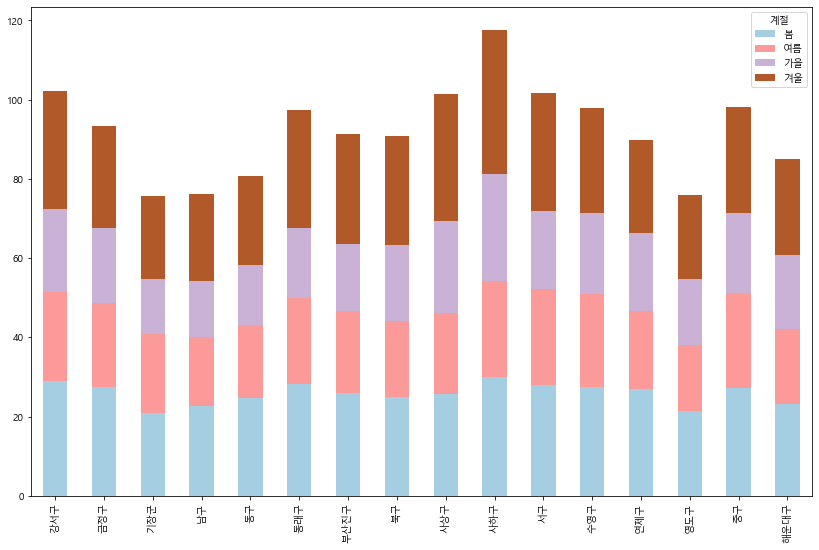

In [366]:
import matplotlib.pylab as plt
plt.rcParams["figure.figsize"] = (14,9)
dff.plot(kind= 'bar', stacked=True, colormap = 'Paired')
